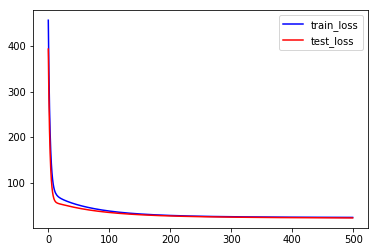

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
from numpy import *

def GradientDescent(X_data, y_data, learn_rate, iter_times, X_test, y_test):
        w = np.zeros((X_data.shape[1] + 1,1))
        X_data = np.c_[X_data, ones(X_data.shape[0])]
        X_data = matrix(X_data)
        y_data = matrix(y_data)
        y_data = y_data.T
        
        X_test = np.c_[X_test, ones(X_test.shape[0])]
        y_test = array([list(y_test)])
        X_test = matrix(X_test)
        y_test = matrix(y_test)
        y_test = y_test.T
        w = matrix(w)
        train_loss = []
        test_loss = []
        for i in range(iter_times):
            w = w + learn_rate*X_data.T*(y_data - X_data * w)
            L = ((y_data - X_data * w).T * (y_data - X_data * w))/X_data.shape[0]
            train_loss.append(array(L)[0][0])
            L2 = ((y_test - X_test * w).T * (y_test - X_test * w))/X_test.shape[0]
            test_loss.append(array(L2)[0][0])
        return w, train_loss, test_loss

    
X, y = load_svmlight_file("linear_data.txt")
X = np.array(X.todense())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
w, train_loss, test_loss = GradientDescent(X_train,y_train,0.0001,500, X_test,y_test)
plt.plot(arange(500),train_loss, 'b', label='train_loss')
plt.plot(arange(500),test_loss, 'r', label='test_loss')
plt.legend(loc='best')
plt.show()

